In [1]:
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import random
import geopandas as gpd


In [2]:


genera = {"snapper": "LUTJANU", 
              "shrimp": "PENAEUS", 
              "menhaden": "BREVOOR", 
              "seatrout": "CYNOSCI", 
              "drum": "SCIAENO", 
              "croaker": "MICROPO",
              "grouper" : "MYCTERO",
              "mackerel" : "SCOMBER",
              "anchovy" : "ANCHOA",
        'STENOTO_CAPRIN': 'STENOTO',
        'CHLOROS_CHRYSU': 'CHLOROS',
        'TRACHYP_SIMILI': 'TRACHYP',
        'PEPRILU_ALEPID': 'PEPRILU',
        'CALLINE_SAPIDU': 'CALLINE',
        'PRIONOT_LONGIS': 'PRIONOT',
        'LOLIGO_PLEII': 'LOLIGO',
        'PORTUNU_SPINIM': 'PORTUNU',
        'SICYONI_BREVIR': 'SICYONI',
        'TRACHUR_LATHAM': 'TRACHUR',
        'LEIOSTO_XANTHU': 'LEIOSTO',
        'SQUILLA_EMPUSA': 'SQUILLA',
        'LAGODON_RHOMBO': 'LAGODON',
        'SYACIUM_GUNTER': 'SYACIUM',
        'SERRANU_ATROBR': 'SERRANU',
        'TRICHIU_LEPTUR': 'TRICHIU',
        'ZOOBOTR_VERTIC': 'ZOOBOTR',
        'AMUSIUM_PAPYRA': 'AMUSIUM',
        'ETRUMEU_TERES': 'ETRUMEU',
        'SYNODUS_FOETEN': 'SYNODUS',
        'CENTROP_PHILAD': 'CENTROP',
        'UPENEUS_PARVUS': 'UPENEUS',
        'LOLLIGU_BREVIS': 'LOLLIGU',
        'ARIUS_FELIS': 'ARIUS',
        'SAURIDA_BRASIL': 'SAURIDA',
}

gens = list(genera.values())

gen = gens[3]

df = pd.read_csv("D:\public_seamap_csvs\\" + gen + "_CPUE.csv")

rows = random.sample(range(df.shape[0]), 800)

df = df.iloc[rows, :]
#df = df.iloc[:100, :] #shrink this to not run out of RAM

Xi = (-df['Lon']).tolist()
Yi = df['Lat'].tolist()
Zi = df['CPUE_MTSQKM'].tolist()



<ipython-input-3-a14a638f1384>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


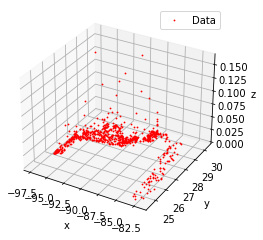

In [3]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot(Xi, Yi, Zi, "or", markersize=0.8, label='Data')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


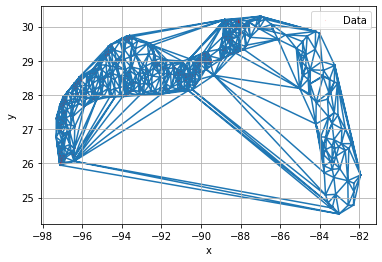

In [4]:
from scipy.spatial import Delaunay
Pi = np.array([Xi, Yi]).transpose()
tri = Delaunay(Pi)
plt.triplot(Xi, Yi , tri.simplices.copy())
plt.plot(Xi, Yi, "or", markersize=0.05, label = "Data")
plt.grid()
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()


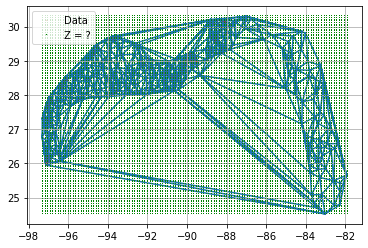

In [5]:

N = 120
x = np.linspace(min(Xi), max(Xi), N)
y = np.linspace(min(Yi), max(Yi), N)
X, Y = np.meshgrid(x, y)
P = np.array([X.flatten(), Y.flatten() ]).transpose()
plt.plot(Xi, Yi, "or", markersize=0.05, label = "Data")
plt.triplot(Xi, Yi , tri.simplices.copy())
plt.plot(X.flatten(), Y.flatten(), "g,", label = "Z = ?")
plt.legend()
plt.grid()
plt.show()


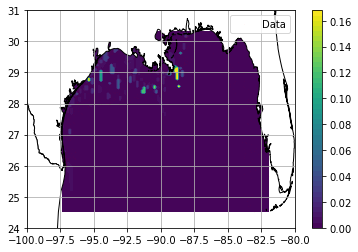

In [6]:
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import fiona

import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch

#sf = shp.Reader("WB_Coastlines_10m.shp")
with fiona.open("WB_countries_Admin0_10m.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

from scipy.interpolate import griddata
Z_nearest = griddata(Pi, Zi, P, method = "nearest").reshape([N, N])
plt.contourf(X, Y, Z_nearest, 50)
plt.plot(Xi, Yi, "or", markersize=0.01, label = "Data")
plt.colorbar()
plt.legend()
plt.grid()
plt.xlim(-100,-80)
plt.ylim(24,31)

ax = mpl.pyplot.gca()
patches = [PolygonPatch(feature,  facecolor="white") for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
plt.show()



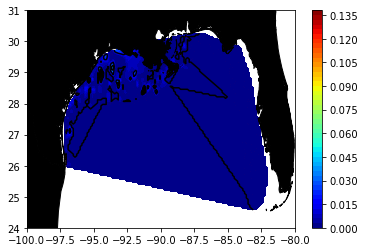

In [7]:
#import shapefile as shp  # Requires the pyshp package
#import matplotlib.pyplot as plt
#sf = shp.Reader("WB_Coastlines_10m.shp")
#print(sf)
with fiona.open("WB_countries_Admin0_10m.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

from scipy.interpolate import griddata
Z_linear = griddata(Pi, Zi, P, method = "linear").reshape([N, N])
plt.contourf(X, Y, Z_linear, 50, cmap = mpl.cm.jet)
plt.colorbar()
plt.contour(X, Y, Z_linear, 10, colors = "k")
#plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
plt.plot(Xi, Yi, "or", markersize=0.01, label = "Data")
plt.xlim(-100,-80)
plt.ylim(24,31)

ax = mpl.pyplot.gca()
patches = [PolygonPatch(feature,  facecolor="black") for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
plt.show()



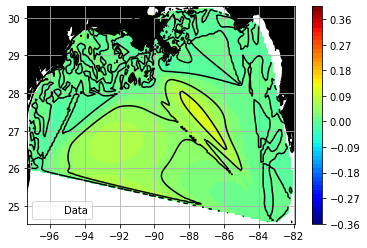

In [8]:
from scipy.interpolate import griddata
Z_cubic = griddata(Pi, Zi, P, method = "cubic").reshape([N, N])
plt.contourf(X, Y, Z_cubic, 50, cmap = mpl.cm.jet)
plt.colorbar()
plt.contour(X, Y, Z_cubic, 20, colors = "k")
#plt.triplot(Xi, Yi , tri.simplices.copy(), color = "k")
plt.plot(Xi, Yi, "or", markersize=0.01, label = "Data")
plt.legend()
plt.grid()
ax = mpl.pyplot.gca()
patches = [PolygonPatch(feature,  facecolor="black") for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches, match_original=True))
plt.show()
plt.show()



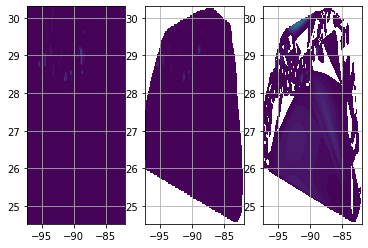

In [9]:

levels = np.linspace(0., 1., 50)
fig = plt.figure()
ax =  fig.add_subplot(1, 3, 1)
plt.contourf(X, Y, Z_nearest, levels)
plt.grid()
ax =  fig.add_subplot(1, 3, 2)
plt.contourf(X, Y, Z_linear, levels)
plt.grid()
ax =  fig.add_subplot(1, 3, 3)
plt.contourf(X, Y, Z_cubic, levels)
plt.grid()